# Tutorial 2, solutions


This solution is a jupyter notebook which allows you to directly interact with
the code so that you can see the effect of any changes you may like to make.

Author: Nicky van Foreest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import poisson

plt.ion()  # to skip making the graphs, I only use it for testing purposes.

scipy.random.seed(3)


def compute_Q_d(a, s, q0=0):
    # a: no of arrivals in a period
    # s: no of services at start of a period
    d = np.zeros_like(a)  # departures
    Q = np.zeros_like(a)  # queue lengths
    Q[0] = q0  # starting level of the queue
    for i in range(1, len(a)):
        d[i] = min(Q[i - 1], s[i])
        Q[i] = Q[i - 1] + a[i] - d[i]

    return Q, d

In [2]:
def experiment_1():
    labda, mu, q0, N = 5, 6, 0, 100
    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)
    print(a.mean(), a.std())


experiment_1()

5.01 2.368522746354782


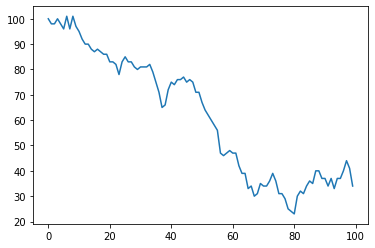

5.51


In [3]:
def experiment_2():
    labda, mu, q0, N = 5, 6, 100, 100
    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)
    Q, d = compute_Q_d(a, s, q0)

    plt.plot(Q)
    plt.show()
    print(d.mean())


experiment_2()

4.95


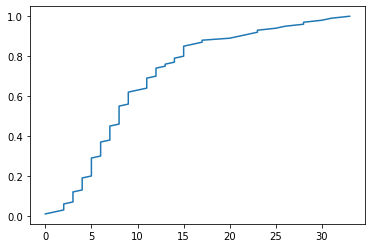

In [4]:
def cdf(a):
    y = range(1, len(a) + 1)
    y = [yy / len(a) for yy in y]  # normalize
    x = sorted(a)
    return x, y


def experiment_3():
    labda, mu, q0, N = 5, 6, 0, 100
    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)
    Q, d = compute_Q_d(a, s, q0)

    print(d.mean())

    x, F = cdf(Q)
    plt.plot(x, F)
    plt.show()


experiment_3()

In [5]:
# A void cell for the numbering    

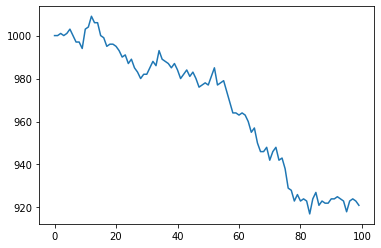

In [6]:
def experiment_4():
    labda, mu = 5, 6
    q0, N = 1000, 100
    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)
    Q, d = compute_Q_d(a, s, q0)
    plt.plot(Q)
    plt.show()


experiment_4()

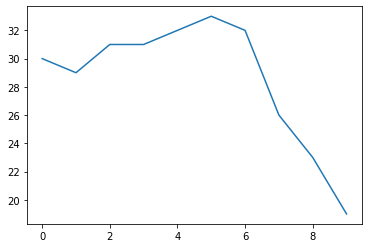

In [7]:
def experiment_5():
    N = 10  # set this to the correct value.
    labda, mu = 5, 6
    q0 = 30

    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)

    Q, d = compute_Q_d(a, s, q0)

    plt.plot(Q)
    plt.show()


experiment_5()

In [8]:
def experiment_6():
    N = 100  # Again, replace the numbers
    labda = 6
    mu = 5
    q0 = 10

    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)

    Q, d = compute_Q_d(a, s, q0)
    print(Q.mean(), Q.std())


experiment_6()

51.93 35.07827105203448


In [9]:
def experiment_6a():
    N = 10  # Use a larger value here
    labda = 5
    mu = 6
    q0 = 0

    a = poisson(labda).rvs(N)
    s = np.ones_like(a) * mu

    Q, d = compute_Q_d(a, s, q0)
    print(Q.mean(), Q.std())


experiment_6a()

4.3 2.3685438564654024


In [10]:
def experiment_6b():
    N = 10  # Change to a larger value.
    labda = 5
    mu = 6
    q0 = 0

    a = poisson(labda).rvs(N)
    s = poisson(1.1 * mu).rvs(N)

    Q, d = compute_Q_d(a, s, q0)
    print(Q.mean(), Q.std())


experiment_6b()

4.8 2.1354156504062622


7.52 4.423754061880023


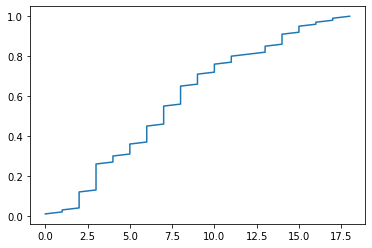

In [11]:
def compute_Q_d_with_extra_servers(a, q0=0, mu=6, threshold=np.inf, extra=0):
    d = np.zeros_like(a)
    Q = np.zeros_like(a)
    Q[0] = q0
    present = False  # extra employees are not in
    for i in range(1, len(a)):
        rate = mu + extra if present else mu  # service rate
        s = poisson(rate).rvs()
        d[i] = min(Q[i - 1], s)
        Q[i] = Q[i - 1] + a[i] - d[i]
        if Q[i] == 0:
            present = False  # send employee home
        elif Q[i] >= threshold:
            present = True  # hire employee for next period

    return Q, d


def experiment_7():
    N = 100  # take a big number here.
    labda = 5
    mu = 6
    q0 = 0

    a = poisson(labda).rvs(N)

    Q, d = compute_Q_d_with_extra_servers(a, q0, mu=6, threshold=20, extra=2)
    print(Q.mean(), Q.std())

    x, F = cdf(Q)
    plt.plot(x, F)
    plt.show()


experiment_7()

7.33 3.9800879387269825


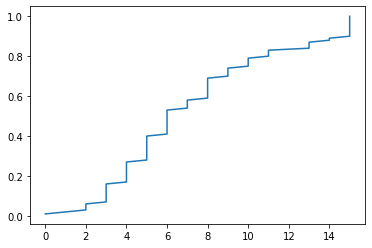

In [12]:
def compute_Q_d_blocking(a, s, q0=0, b=np.inf):
    # b is the blocking level.
    d = np.zeros_like(a)
    Q = np.zeros_like(a)
    Q[0] = q0
    for i in range(1, len(a)):
        d[i] = min(Q[i - 1], s[i])
        Q[i] = min(b, Q[i - 1] + a[i] - d[i])

    return Q, d


def experiment_7a():
    N = 100  # take a larger value
    labda = 5
    mu = 6
    q0 = 0

    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)

    Q, d = compute_Q_d_blocking(a, s, q0, b=15)
    print(Q.mean(), Q.std())

    x, F = cdf(Q)
    plt.plot(x, F)
    plt.show()


experiment_7a()

In [13]:
def compute_cost(a, mu, q0=0, threshold=np.inf, h=0, p=0, S=0):
    d = np.zeros_like(a)
    Q = np.zeros_like(a)
    Q[0] = q0
    present = False  # extra employee is not in.
    queueing_cost = 0
    server_cost = 0
    setup_cost = 0
    for i in range(1, len(a)):
        if present:
            server_cost += p
            c = poisson(mu).rvs()
        else:
            c = 0  # server not present, hence no service
        d[i] = min(Q[i - 1], c)
        Q[i] = Q[i - 1] + a[i] - d[i]
        if Q[i] == 0:
            present = False  # send employee home
        elif Q[i] >= threshold:
            present = True  # switch on server
            setup_cost += S
        queueing_cost += h * Q[i]

    print(queueing_cost, setup_cost, server_cost)

    total_cost = queueing_cost + server_cost + setup_cost
    num_periods = len(a) - 1
    average_cost = total_cost / num_periods
    return average_cost


def experiment_8():
    N = 100
    labda = 0.3
    mu = 1
    q0 = 0
    theta = 100  # threshold

    h = 1
    p = 5
    S = 500

    a = poisson(labda).rvs(N)
    av = compute_cost(a, mu, q0, theta, h, p, S)
    print(av)


experiment_8()

1210 0 0
12.222222222222221


In [14]:
def experiment_9():
    N = 10  # Change to a larger value.
    labda = 5
    mu = 6
    q0 = 0

    a = poisson(labda).rvs(N)
    s = poisson(mu).rvs(N)

    Q, d = compute_Q_d(a, s, q0)
    loss = (Q > 20).sum()
    print(loss)
    total_demand = a.sum() 
    print(100 * loss / total_demand)


experiment_9()


0
0.0
